# LOB-Bench Tutorial Notebook - NO MESSAGES TUTORIAL

For detailed documentation, please see the README file. 
We start by importing the required modules

This is very similar to the version with messages. The only difference is that we pass a --no_messages flag to run_bench and run_plotting and they will just do stats on the orderbook. Here we also save the results to a separate results_no_messages folder, but this is not necessary. 

In [1]:
%load_ext autoreload
%autoreload 2

### Data Download
The downloading of generated sample data based on publicly available LOBSTER data. For proper model training and generation, LOBSTER access is required. However, this allows for a demonstration of the benchmark functionality. Most plots will be different to that expected due to this public data containing only a single day.

Note that this data-set is very small and is likely to give erroneous behaviour in the below plots. It serves merely as an illustrative example which allows for execution of the codebase.

In [2]:
import urllib.request
url = 'https://drive.google.com/uc?id=1b5FskJykGbWvVwKd7YhzRwEf0YIcmOR9&export=downloads'
filename = 'test.zip'
urllib.request.urlretrieve(url, filename)

('test.zip', <http.client.HTTPMessage at 0x7f8de05769b0>)

In [3]:
import zipfile
with zipfile.ZipFile("test.zip", 'r') as zip_ref:
    zip_ref.extractall("sample_data/")

### Run Benchmark calculations for scoring.

## Run the benchmark

The benchmark consists of 3 seperate files, they default to using the sample data which is downloaded above, but this can be configured.

This first file calculates all the scores and saves them in a directory (configurable) which will be used for plotting. Various config options exist to calculate only conditional, unconditional, or divergence scores. 

In [ ]:
%run -i run_bench.py --no_messages --save_dir "results_no_messages"

*** 	The assumed file structure for files in this package is:
***	 	 {DATA_DIR}/{MODEL}/{STOCK}/data_*
***	whereby DATA_DIR is passed as an argument when launching the script
***	{MODEL}s and {STOCK}s may either be passed as a str or a list of str
***	The script will iterate over all combinations of models and stocks

[*] Loading generated data from sample_data_no_messages/data_saved/large_model_sample/GOOG
[*] Running unconditional scoring
Calculating scores and metrics for:  spread
Calculating scores and metrics for:  orderbook_imbalance
Calculating scores and metrics for:  ask_volume_touch
Calculating scores and metrics for:  bid_volume_touch
Calculating scores and metrics for:  ask_volume
Calculating scores and metrics for:  bid_volume
Calculating scores and metrics for:  ofi
Calculating scores and metrics for:  ofi_up
Calculating scores and metrics for:  ofi_stay
Calculating scores and metrics for:  ofi_down
[*] Saving results...
... done
[*] Running conditional scoring
Calculatin

### Run Plotting 
The second file takes saved scores to plot them. Again the default directories are used. 

[*] Loading data...
[*] Plotting divergence plots


Stock: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.24s/it]


[*] Plotting unconditional histograms


Stock: 100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [05:08<00:00, 308.52s/it]


[*] Plotting conditional histograms


Stock: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:20<00:00, 20.12s/it]


[*] Plotting summary stats
{'GOOG': {'large': {'l1': ((0.4703595470687038, array([0.46547542, 0.47756778])), (0.5302612826603326, array([0.50926518, 0.54386819])), (array(0.52402642), array([0.51301661, 0.53821179]))), 'wasserstein': ((0.4485604638208762, array([0.44100929, 0.45723287])), (0.4044249644099903, array([0.39478404, 0.41327049])), (array(0.41044089), array([0.40000841, 0.42175394])))}}}
[*] Plotting comparison plots
[*] Done


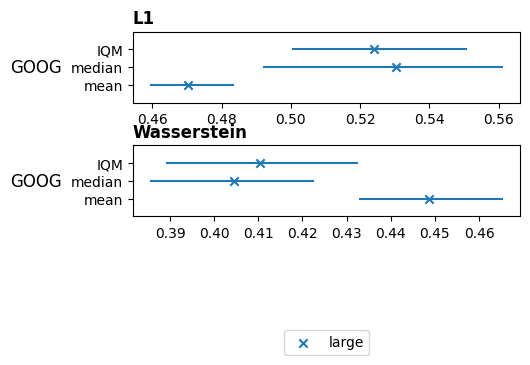

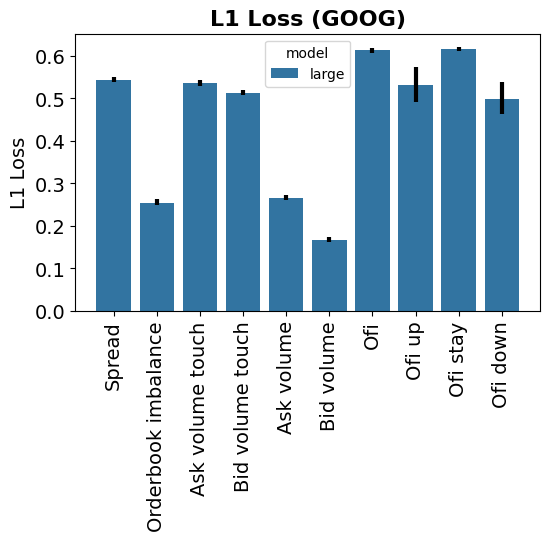

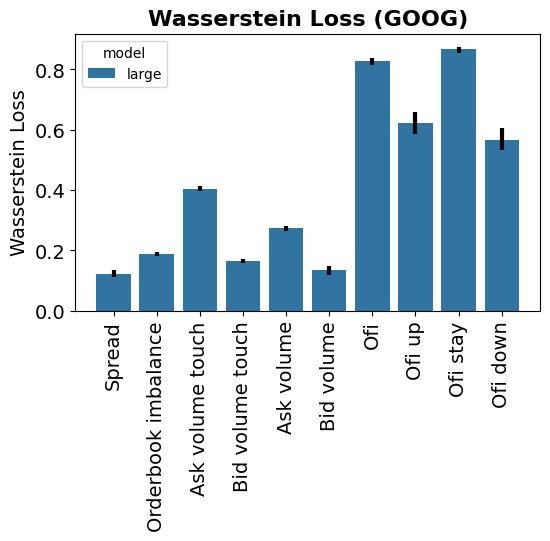

In [17]:
%run -i run_plotting.py --score_dir "results_no_messages/scores" --plot_dir "results_no_messages/plots"

### Run Impact IS NOT POSSIBLE WITHOUT MESSAGES
Finally, the impact study can be calculated and plotted with 'impact.py' Here it is required to give a flag for which parts should be calculated. We propose the micro impact calculation and plotting (this is in the paper).

In [19]:
# %run -i impact.py --micro_calculate --micro_plot